# Project Capstone:  NBA PLAYERS SCORING PREDICTION
## Nicolas Monvert, EPFL Extension School 2020
## Part 2 : Exploratory Data Analysis

In the first part, I built an exploitable dataset, where I did some cleaning, check its quality and added a bunch of new feature to enrich it.

In this part, my aim is to better understand my data to determine what can have an impact on my target of points scored per game. By digging into visuals, I want to get insights out of it, to demonstrate potential trends and eventually to discover things that I ignored.

The EDA part will contain 2 types of information:
 - An overview of the full set of data. To see information on a higher level and in some case make comparison amongst players.
 - Deep dive on one single player (LeBron James on this occasion) to have an idea of what to expect during for our predictions.

### Import main librairies

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Load CSV Files

In [2]:
main = pd.read_csv('main.csv')
main.head(3)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,FG_PCT,FGA,FGM,REB,MIN,PTS,...,Opponent_City_Oklahoma City,Opponent_City_Orlando,Opponent_City_Philadelphia,Opponent_City_Phoenix,Opponent_City_Portland,Opponent_City_Sacramento,Opponent_City_San Antonio,Opponent_City_Toronto,Opponent_City_Utah,Opponent_City_Washington
0,21900895,1610612749,Milwaukee,Wesley Matthews,0.273,11.0,3.0,8.0,27.0,8.0,...,0,0,0,0,0,0,0,0,0,0
1,21900669,1610612749,Milwaukee,Wesley Matthews,0.333,3.0,1.0,1.0,17.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,21900283,1610612749,Milwaukee,Wesley Matthews,0.556,9.0,5.0,3.0,21.0,14.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Data for LeBron James only
lbj = pd.read_csv('lbj.csv')
lbj.head(3)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,FG_PCT,FGA,FGM,REB,MIN,PTS,...,Opponent_City_Oklahoma City,Opponent_City_Orlando,Opponent_City_Philadelphia,Opponent_City_Phoenix,Opponent_City_Portland,Opponent_City_Sacramento,Opponent_City_San Antonio,Opponent_City_Toronto,Opponent_City_Utah,Opponent_City_Washington
0,21900040,1610612747,Los Angeles,LeBron James,0.500,14.0,7.0,6.0,35.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1,21900220,1610612747,Los Angeles,LeBron James,0.450,20.0,9.0,6.0,35.0,23.0,...,1,0,0,0,0,0,0,0,0,0
2,21900201,1610612747,Los Angeles,LeBron James,0.476,21.0,10.0,11.0,37.0,25.0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
# Check shape of the two DF above
print(main.shape)
print(lbj.shape)

(420394, 104)
(1563, 104)


## Part 1: Full dataset with all players

Firstly to see __correlation of the numerical features chosen with our target__.

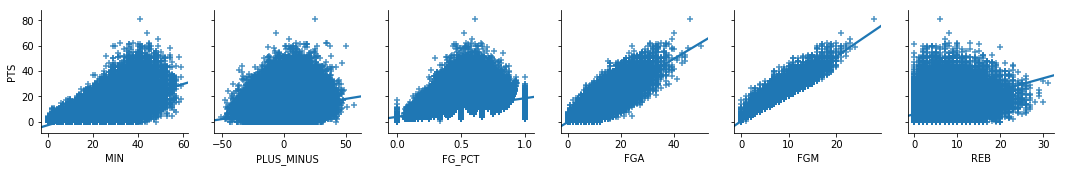

In [5]:
# On original features
sns.pairplot(main, kind='reg', y_vars='PTS',x_vars=['MIN','PLUS_MINUS','FG_PCT','FGA','FGM','REB',], markers="+");

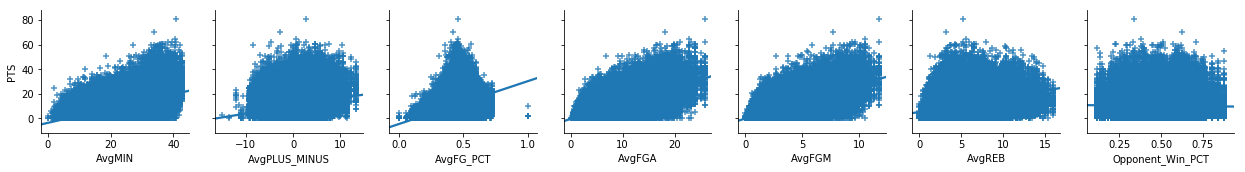

In [6]:
# Features that I created
sns.pairplot(main, kind='reg', y_vars='PTS',x_vars=['AvgMIN','AvgPLUS_MINUS','AvgFG_PCT','AvgFGA','AvgFGM','AvgREB','Opponent_Win_PCT'], markers="+");

I think that except the measures related directly to the scoring (FG*) it is difficult to identify a clear trend. One reason is probably due to the size of the dataset that is quite big, therefore offsetting potential white space. At least there is no collinearity.
Obviously, the second set is less accurate, as I work here on the season average.

### Check distribution of our data

In [7]:
# To have an overview of all our data with float or integers
num=main.select_dtypes(include=['float','int64']).columns
num

Index(['GAME_ID', 'TEAM_ID', 'FG_PCT', 'FGA', 'FGM', 'REB', 'MIN', 'PTS',
       'PLUS_MINUS', 'TEAM_ID_home', 'HOME_TEAM_WINS_x', 'VISITOR_TEAM_WINS_x',
       'AvgMIN', 'AvgPLUS_MINUS', 'AvgFG_PCT', 'AvgFGA', 'AvgFGM', 'AvgREB',
       'Opponent_Win_PCT', 'TEAM_WIN', 'SEASON_Ori', 'START_POSITION_C',
       'START_POSITION_F', 'START_POSITION_G', 'START_POSITION_substitute',
       'SEASON_2003', 'SEASON_2004', 'SEASON_2005', 'SEASON_2006',
       'SEASON_2007', 'SEASON_2008', 'SEASON_2009', 'SEASON_2010',
       'SEASON_2011', 'SEASON_2012', 'SEASON_2013', 'SEASON_2014',
       'SEASON_2015', 'SEASON_2016', 'SEASON_2017', 'SEASON_2018',
       'SEASON_2019', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_April', 'month_December', 'month_February',
       'month_January', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'Hom

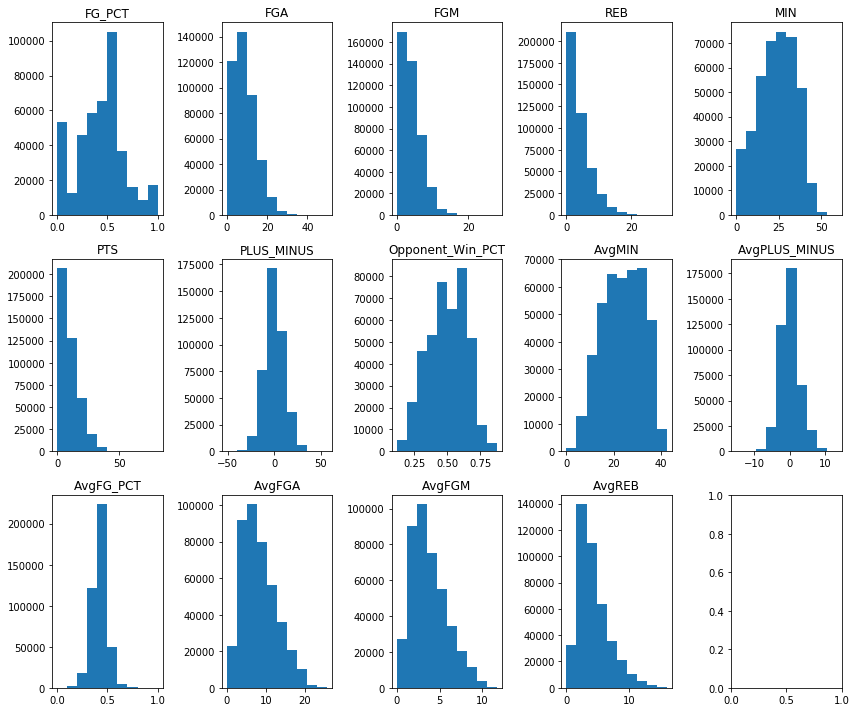

In [8]:
num1=['FG_PCT', 'FGA', 'FGM', 'REB', 'MIN', 'PTS','PLUS_MINUS','Opponent_Win_PCT',
      'AvgMIN','AvgPLUS_MINUS','AvgFG_PCT', 'AvgFGA', 'AvgFGM', 'AvgREB']
# To determine the distribution of our numerical data
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 10))
for c, ax in zip(num1, axes.ravel()):
    ax.hist(main[c].dropna(), bins=10)
    ax.set_title(c)
plt.tight_layout()
plt.show()

As we can see, we do have some data that are left skewed when having all players in the scope. Therefore, I might get better results if I apply a log transformation on them. But we will see in the notebooks ML, if it makes sense to apply log when predicting a single player.

In [9]:
main.groupby('SEASON_Ori')['PTS'].mean()

SEASON_Ori
2003    10.615385
2004    10.681213
2005    10.279300
2006    10.108937
2007    10.083469
2008    10.159752
2009    10.066399
2010     9.882988
2011     9.558839
2012     9.660352
2013    10.024080
2014     9.747148
2015     9.895100
2016    10.268859
2017    10.815093
2018    11.481676
2019    11.868302
Name: PTS, dtype: float64

In [10]:
main.groupby('SEASON_Ori')['PTS'].sum()

SEASON_Ori
2003    197202.0
2004    236685.0
2005    262595.0
2006    268089.0
2007    273141.0
2008    276457.0
2009    278648.0
2010    275429.0
2011    204129.0
2012    270258.0
2013    276825.0
2014    273427.0
2015    282327.0
2016    282599.0
2017    256242.0
2018    242183.0
2019    141304.0
Name: PTS, dtype: float64

### Data Vizualisation

In this part, I will go through a bunch of selected features and trying to display the impact and their potential correlation they have on scoring.

Display on a scatter plot the __correlation of games played and average / median points scored__

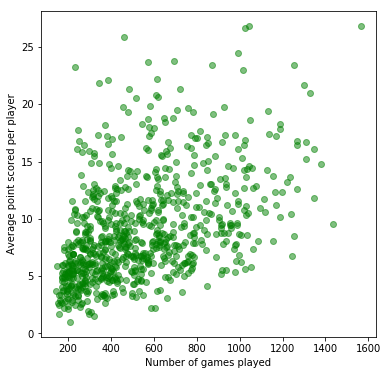

In [11]:
# Number of games played overall with overall Points made - MEAN
x1=main.groupby('PLAYER_NAME')['GAME_ID'].count()
y1=main.groupby('PLAYER_NAME')['PTS'].mean()

plt.figure(figsize=(6,6))
plt.scatter(x1,y1, c='g', alpha=0.5)
plt.xlabel('Number of games played')
plt.ylabel('Average point scored per player');

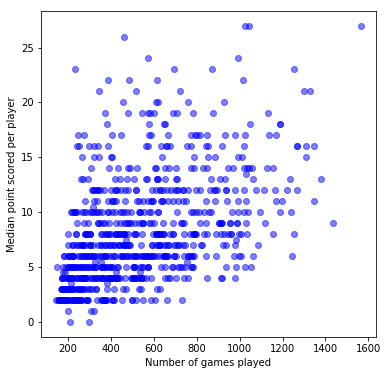

In [12]:
# Number of games played overall with overall Points made - MEDIAN
x1=main.groupby('PLAYER_NAME')['GAME_ID'].count()
y1=main.groupby('PLAYER_NAME')['PTS'].median()

plt.figure(figsize=(6,6))
plt.scatter(x1,y1, c='b', alpha=0.5)
plt.xlabel('Number of games played')
plt.ylabel('Median point scored per player');

I tried both the __mean and the median__ and they react the same. There is a trend, what I can tell at this stage is; if a player want to last in the NBA, it is better for him to be a high scorer. We notice that the more we go to the right, the more the average point scored is increasing (or has to increase!).

To see the correlation with the __PLUS and MINUS__ and the number of point scored.

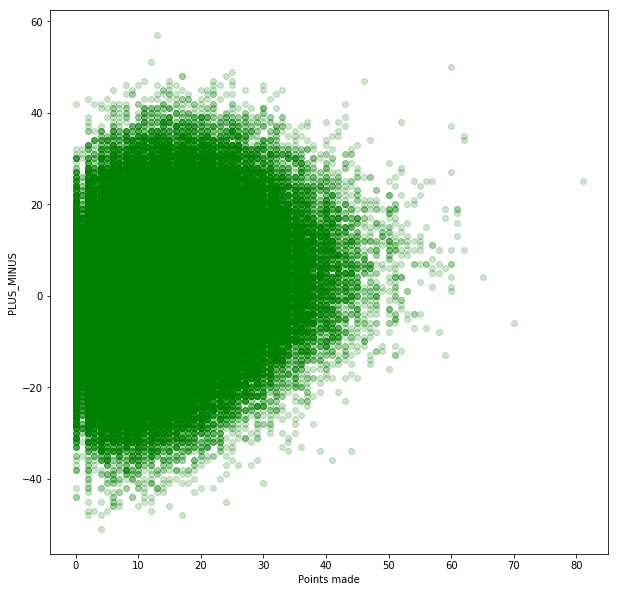

In [13]:
# Scatter plot of PLUS_MINUS and average points made for all players
x2=main['PTS']
y2=main['PLUS_MINUS']

plt.figure(figsize=(10,10))
plt.scatter(x2,y2, c='g', alpha=0.2)
plt.xlabel('Points made')
plt.ylabel('PLUS_MINUS');

By looking at this over populated chart, we could draw a triangle in bottom right part, which mean that the more you score, the more your impact on PLUS_MINUS is increasing. On top of the chart, we noticed that between 10 and 30 on the X-axis, we have a kind of a peak (round shape), which is totally understandable, because it is quite seldom that a player score more than 30 points per game.<br>
The best record of points made during a game is 81 points, it has been set by Kobe Bryant in 2006. Well, in this case the impact on the game was only around 20... 

Out of curiosity and for the sake of the readingness, below I will deep dive __with a selection of the 25 players__ that have the most games on their counter for the next two charts.

In [14]:
#Create a selector for the 25 first player with most games played
items = main.PLAYER_NAME.value_counts().to_dict().items()
main25 = main[main.PLAYER_NAME.isin([key for key, val in items if val > 1160])] #1160 being the cut for the 26th player

Below I display the top 10 of players that have play the most games in my dataset. Note that it goes only back to 2003, therefore not exhaustive as the NBA championship officially started in 1949. 

In [15]:
# Display player per number of games
main25['PLAYER_NAME'].value_counts()[:10].to_frame().style.bar()

,PLAYER_NAME
LeBron James,1563
Kyle Korver,1434
Vince Carter,1377
Tony Parker,1345
Andre Iguodala,1345
Dirk Nowitzki,1330
Jamal Crawford,1309
Joe Johnson,1307
Dwyane Wade,1299
Dwight Howard,1269


Below I am analysing the same selection of players with most games played, to see actually how many points they scored over their career.

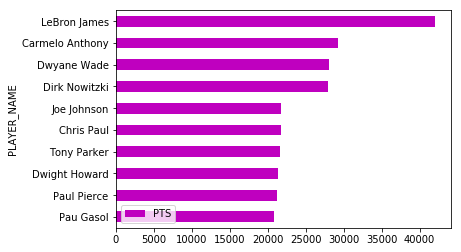

In [16]:
x=main25.groupby('PLAYER_NAME')['PTS'].sum()
x.sort_values(ascending=False, inplace=True)
x=x.to_frame()
x[:10].plot(kind='barh',color='m')
plt.gca().invert_yaxis()
plt.legend(loc='lower left');

Interestingly, there is a quite big gap between the 1st and the 2nd. Let's select the __25 players that have scored the most__, to see if we find the same players.<br> Now let's work on the entire dataset (main and not main25) to compare if it differs a lot.

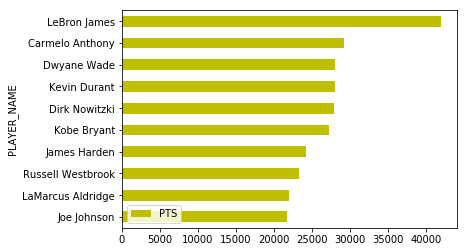

In [17]:
z=main.groupby('PLAYER_NAME')['PTS'].sum()
z.sort_values(ascending=False, inplace=True)
z=z.to_frame()
z[:10].plot(kind='barh',color='y')
plt.gca().invert_yaxis()
plt.legend(loc='lower left');

Without going into details because it goes beyond this project, we can directly see that there is an obvious correlation. The more games you played, the more you have scored in you carreer. In the 'Z' dataframe, when a name such as Kobe Bryant or James Harden pop up, it means that their average point per game is higher than the average lambda player. It is also noticeable that some player appearing in the first chart, are not appearing anymore on scoring, it means that their average shooting is automatically lower than the top 10 displayed here.

Below I am working on my 25main players dataset to actually display their respective weight in scoring (within the 25 selection).

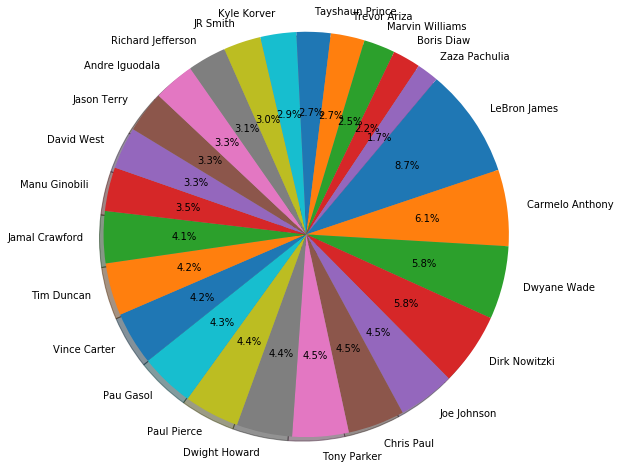

In [18]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(x.PTS,labels=x.index, counterclock=False, autopct='%1.1f%%', shadow=True, startangle=50)
ax1.axis('equal')
plt.show()

We visually notice that the 10 first player (from LeBron James to Pau Gasol) scored the same amount of point than the next 15 players.

As of now, I won't use the main25 dataframe anymore.<br>Below, I intend to display variation in scoring __by starting position__ that is one important feature that we have.

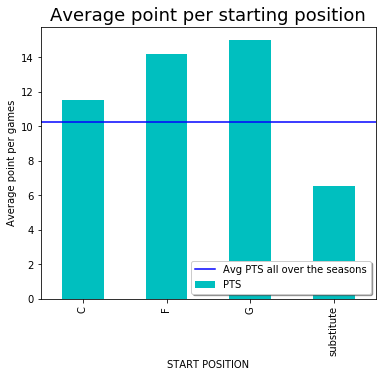

In [19]:
fig,ax= plt.subplots()
main.groupby('START_POSITION_ori')['PTS'].mean().plot(kind='bar',color='c', ax=ax, figsize=(6,5))
ax.axhline(main['PTS'].mean(), c='b', linestyle='-', label="Avg PTS all over the seasons")
ax.set_xlabel('START POSITION')
ax.set_ylabel('Average point per games')
ax.set_title(('Average point per starting position'), fontsize=18)
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True);

Here we can see that the starting position has clearly an impact on the scoring of a player. It is quite important, because a coach can decide that a single player can be place at different position when playing against certain team. Below we will see that impact it has on LeBron James.

This chart demonstrates that players that are not part of the starting 5 main players (subsitute, from the bench) are on average scoring less, which totally make sense.

## Part 2: Focus on a single player

As already mentioned, my focus will be Lebron James. But by changing the filter on the CSV from the first notebook, we could perform the same analysis for other players.<br>
My initial hypothesis is based on its reputation is to be stable, regular season after season. Let's see if we can visually confirm this.

In [20]:
# Quick overview of the content of our Dataset
list(lbj)

['GAME_ID',
 'TEAM_ID',
 'TEAM_CITY',
 'PLAYER_NAME',
 'FG_PCT',
 'FGA',
 'FGM',
 'REB',
 'MIN',
 'PTS',
 'PLUS_MINUS',
 'GAME_DATE_EST',
 'TEAM_ID_home',
 'HOME_TEAM_CITY',
 'HOME_TEAM_WINS_x',
 'VISITOR_TEAM_CITY',
 'VISITOR_TEAM_WINS_x',
 'AvgMIN',
 'AvgPLUS_MINUS',
 'AvgFG_PCT',
 'AvgFGA',
 'AvgFGM',
 'AvgREB',
 'Opponent_Win_PCT',
 'TEAM_WIN',
 'SEASON_Ori',
 'weekday_Ori',
 'month_Ori',
 'START_POSITION_ori',
 'Home/Away_Ori',
 'Opponent_City_Ori',
 'START_POSITION_C',
 'START_POSITION_F',
 'START_POSITION_G',
 'START_POSITION_substitute',
 'SEASON_2003',
 'SEASON_2004',
 'SEASON_2005',
 'SEASON_2006',
 'SEASON_2007',
 'SEASON_2008',
 'SEASON_2009',
 'SEASON_2010',
 'SEASON_2011',
 'SEASON_2012',
 'SEASON_2013',
 'SEASON_2014',
 'SEASON_2015',
 'SEASON_2016',
 'SEASON_2017',
 'SEASON_2018',
 'SEASON_2019',
 'weekday_Friday',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'month_April',
 'month_December',


Let's start to see if we have __correlation between our features and our target__ for our single player.

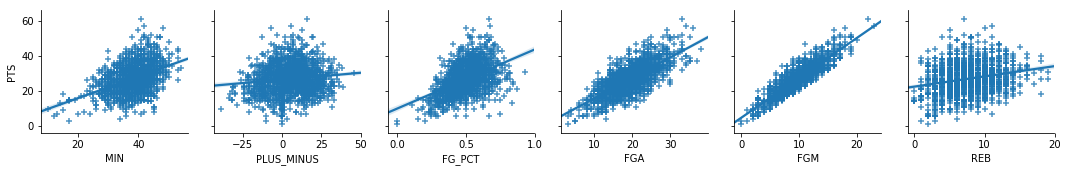

In [21]:
# Original features
sns.pairplot(lbj, kind='reg', y_vars='PTS',x_vars=['MIN','PLUS_MINUS','FG_PCT','FGA','FGM','REB',], markers="+");

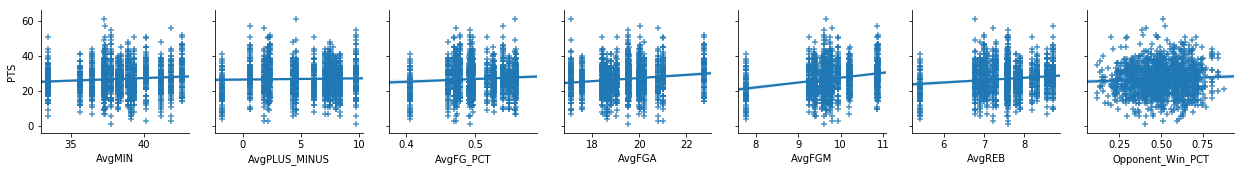

In [22]:
# Features that I created
sns.pairplot(lbj, kind='reg', y_vars='PTS',x_vars=['AvgMIN','AvgPLUS_MINUS','AvgFG_PCT','AvgFGA','AvgFGM','AvgREB','Opponent_Win_PCT'], markers="+");

WIth the previously seen full dataset, it was pretty complicated to clearly distinguish trend, probably due to the large amount of rows. As we are now working with a single player, it is easier to see trends for the original data (1st plot). On the other hand, for the Averaged data (2nd plot) it is less clear. 

### Data Vizualisation

To start our vizualisation part lets start with the distribution of Lebron James points (feature is an integer).

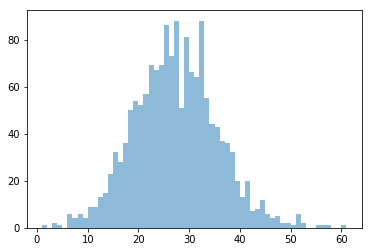

In [23]:
plt.hist(lbj['PTS'], alpha=0.5, bins=60);

Distribution is almost perfect. Except a drop around 27 points. This chart will help to understand my prediction on the ML part.

The __average minutes played__ and __average PLUS_MINUS__ are 2 of the main important measure to analyse, let see if they are correlated together.

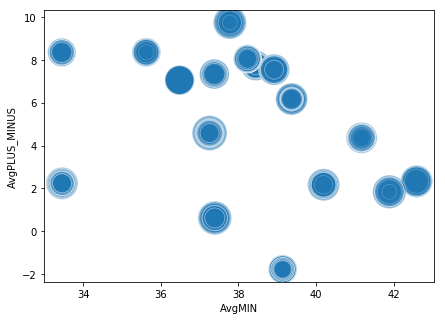

In [24]:
x=lbj['AvgMIN']
y=lbj['AvgPLUS_MINUS']
s=lbj['PTS']
plt.figure(figsize = (7,5))
ax = sns.scatterplot(x=x, y=y, alpha = 0.5,s=s*20)

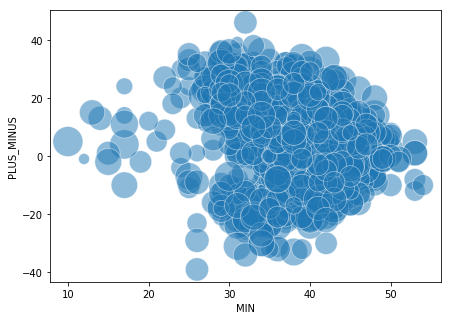

In [25]:
# Same chart but without the average per season
xx=lbj['MIN']
yy=lbj['PLUS_MINUS']
plt.figure(figsize = (7,5))
ax = sns.scatterplot(x=xx, y=yy, alpha = 0.5,s=s*20)

On the first chart, which is averaged per season display that indeed, between 35 and 39 minutes (X-axis), that is where the player has the most impact, as we see a grouping above 6 AvgPLUS_Minus (y-axis). Quite clearly, playing more than 39 minutes seems to reduce the impact of the player.<br>
In addition, we the second chart has quite some noise and overlapping data so a bit tough to interpret, but it seems not so different. 
<br><br>
In addition, below the chart tells us that he had more impact in Miami, which also make sense as it is the middle of his career.

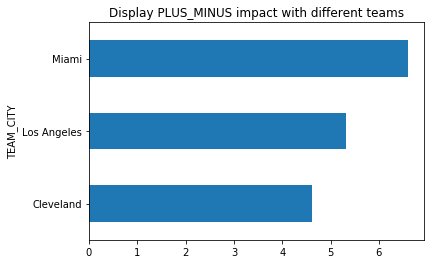

In [26]:
# Display the variation of the impact where Lebron James played
x=lbj.groupby('TEAM_CITY')['PLUS_MINUS'].mean()
x.plot.barh()
plt.title("Display PLUS_MINUS impact with different teams");

Now, let's dig into the __scoring behaviour__, firstly when he was playing in different teams.

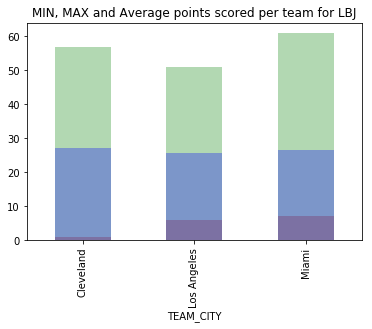

In [27]:
# To diplay min, max, mean on the same chart.
min=lbj.groupby('TEAM_CITY')['PTS'].min()
max=lbj.groupby('TEAM_CITY')['PTS'].max()
avg=lbj.groupby('TEAM_CITY')['PTS'].mean()
min.plot.bar(alpha=0.3, color='r')
max.plot.bar(alpha=0.3, color='g')
avg.plot.bar(alpha=0.3, color='b')
plt.title("MIN, MAX and Average points scored per team for LBJ");

If I had to comment this above chart, I would have the same conclusion as the one above; he had his better days in Miami! Unfortunately my model does not include any information about the climate 😉 <br>
Last figures to confirm this trend below, where it denotes that he had a better rate in Field Goal Percentages in Miami.

In [47]:
# Number of games played in each team
lbj['TEAM_CITY'].value_counts()

Cleveland      1043
Miami           401
Los Angeles     119
Name: TEAM_CITY, dtype: int64

In [28]:
# Diplay the % of field goal made per team for LeBron James
lbj.groupby('TEAM_CITY')['FG_PCT'].mean()

TEAM_CITY
Cleveland      0.490333
Los Angeles    0.503857
Miami          0.532970
Name: FG_PCT, dtype: float64

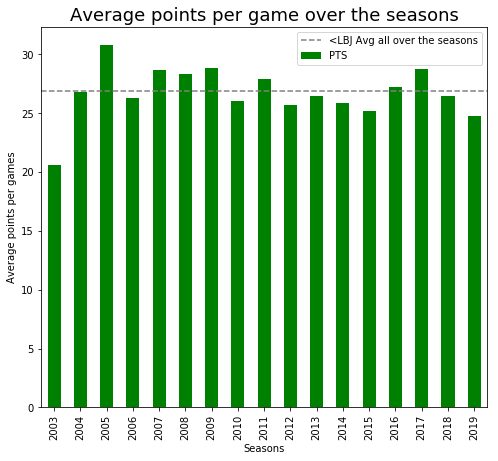

In [29]:
fig,ax= plt.subplots()
lbj.groupby('SEASON_Ori')['PTS'].mean().plot(kind='bar',color='g', ax=ax, figsize=(8,7))
ax.axhline(lbj['PTS'].mean(), c='grey', linestyle='dashed', label="<LBJ Avg all over the seasons")
ax.set_xlabel('Seasons')
ax.set_ylabel('Average points per games')
ax.set_title(('Average points per game over the seasons'), fontsize=18)
plt.legend();

Here we learn that after 3 seasons he actually reach his average maximum. No need to apply a linear regression to see that since 2006 his average is slowing decreasing. Pretty luckily our dataset retrieve data as of 2003, which is also the first NBA season for LeBron James.

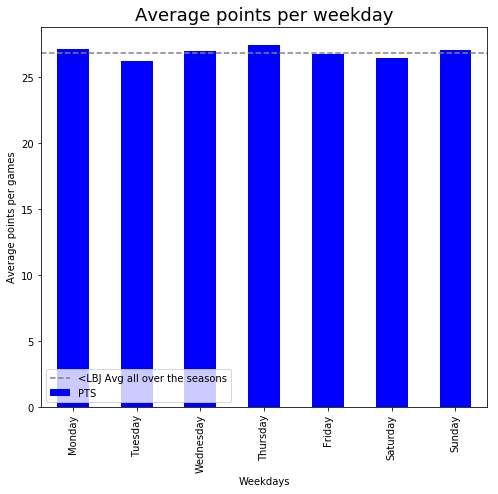

In [52]:
orderD = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig,ax= plt.subplots()
lbj.groupby('weekday_Ori')['PTS'].mean().loc[orderD].plot(kind='bar',color='b', ax=ax, figsize=(8,7))
ax.axhline(lbj['PTS'].mean(), c='grey', linestyle='dashed', label="<LBJ Avg all over the seasons")
ax.set_xlabel('Weekdays')
ax.set_ylabel('Average points per games')
ax.set_title(('Average points per weekday'), fontsize=18)
plt.legend();

The one above, just tell us that we don't have to expect much out of the weekday for him, except Tuesday and Saturday that are slighly below, it seems not significantly affecting him.

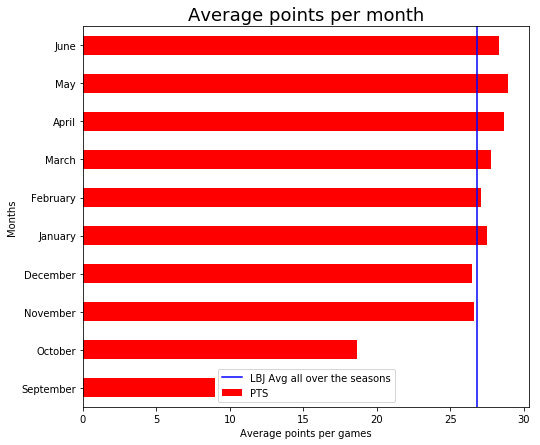

In [48]:
order = ['September', 'October', 'November','December','January','February','March','April','May','June']

fig,ax= plt.subplots()
lbj.groupby('month_Ori')['PTS'].mean().loc[order].plot(kind='barh',color='r', ax=ax, figsize=(8,7))
ax.axvline(lbj['PTS'].mean(), c='b', linestyle='-', label="LBJ Avg all over the seasons")
ax.set_xlabel('Average points per games')
ax.set_ylabel('Months')
ax.set_title(('Average points per month'), fontsize=18)
plt.legend();

However, this one is more talkative. Over the season, 3 months are crucials, the 3 months over the playoffs, namely APR, MAY, JUN. March, which is coming right after in terms of scoring is also an important one because this one led to the playoffs. This confirms his reputation as a key player. But let's have a look now on the average number of minutes played per month, because it could also explain this trend (more minutes played, more opportunity to score). 

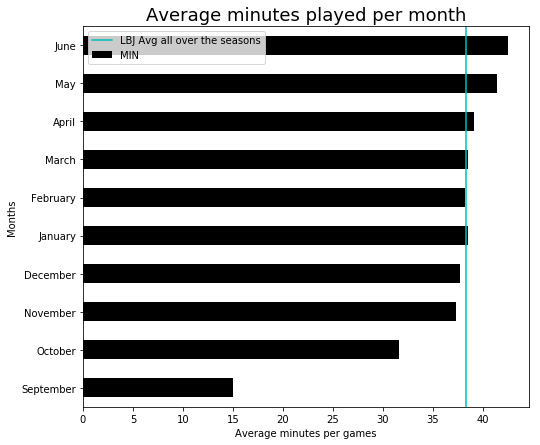

In [49]:
fig,ax= plt.subplots()
lbj.groupby('month_Ori')['MIN'].mean().loc[order].plot(kind='barh',color='k', ax=ax, figsize=(8,7))
ax.axvline(lbj['MIN'].mean(), c='c', linestyle='-', label="LBJ Avg all over the seasons")
ax.set_xlabel('Average minutes per games')
ax.set_ylabel('Months')
ax.set_title(('Average minutes played per month'), fontsize=18)
plt.legend();

Here we basically see the same trend, which confirms the obvious correlation between minutes played and the points made.<br>
But I would add another personnal analysis; It is because his status as franchise player that he plays more in the crucial games and then scoring more in those games. Because to go deeper in the analysis we have to see if the overall average scoring in those month is significantly higher. As shown below, the overall number of points during those months are not higher, and actually even lower, which confirm my initial hypothesis.<br><br>
Therefore we can safely tell that he has an impact on scoring higher than the average player and our feature is important for our model.

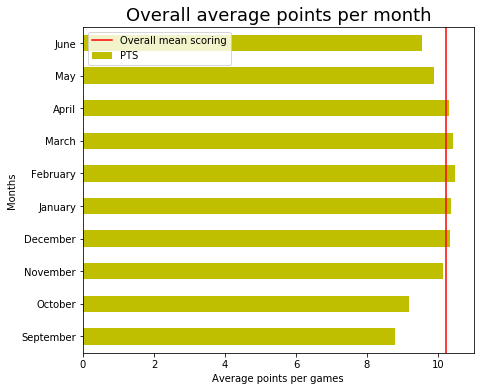

In [50]:
fig,ax= plt.subplots()
main.groupby('month_Ori')['PTS'].mean().loc[order].plot(kind='barh',color='y', ax=ax, figsize=(7,6))
ax.axvline(main['PTS'].mean(), c='r', linestyle='-', label="Overall mean scoring")
ax.set_xlabel('Average points per games')
ax.set_ylabel('Months')
ax.set_title(('Overall average points per month'), fontsize=18)
plt.legend();

Now let's display the average PTS per game per __position type__

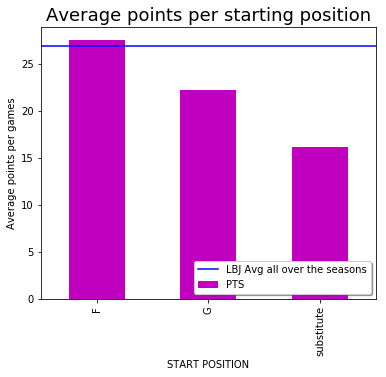

In [34]:
fig,ax= plt.subplots()
lbj.groupby('START_POSITION_ori')['PTS'].mean().plot(kind='bar',color='m', ax=ax, figsize=(6,5))
ax.axhline(lbj['PTS'].mean(), c='b', linestyle='-', label="LBJ Avg all over the seasons")
ax.set_xlabel('START POSITION')
ax.set_ylabel('Average points per games')
ax.set_title(('Average points per starting position'), fontsize=18)
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True);

In [35]:
lbj['START_POSITION_ori'].value_counts(normalize=True) * 100

F             90.914907
G              5.694178
substitute     3.390915
Name: START_POSITION_ori, dtype: float64

To complete what we see above, the weight of each postion for LBJ. Without any surprise, we confirm that playing "F" (forward) is pushing the % on top, and it is also his favorite position.

__About scoring when his own team is winning or losing__

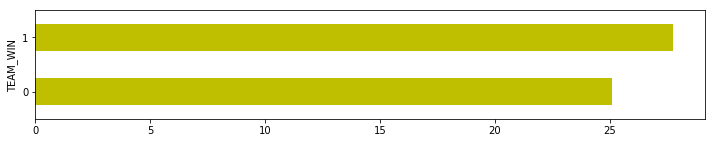

In [36]:
fig,ax= plt.subplots()
lbj.groupby('TEAM_WIN')['PTS'].mean().plot(kind='barh',color='y', ax=ax, figsize=(12,2));

Here not need to into details, we can identify that he scores more when his team wins.<br>
Which could be interpreted as; if he scores well, the team wins.

__About scoring at home or away__

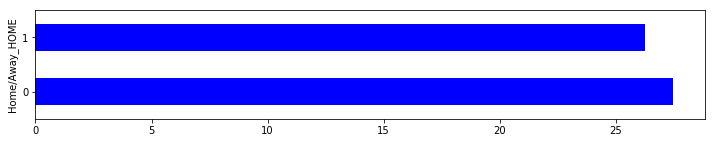

In [37]:
fig,ax= plt.subplots()
lbj.groupby('Home/Away_HOME')['PTS'].mean().plot(kind='barh',color='b', ax=ax, figsize=(12,2));

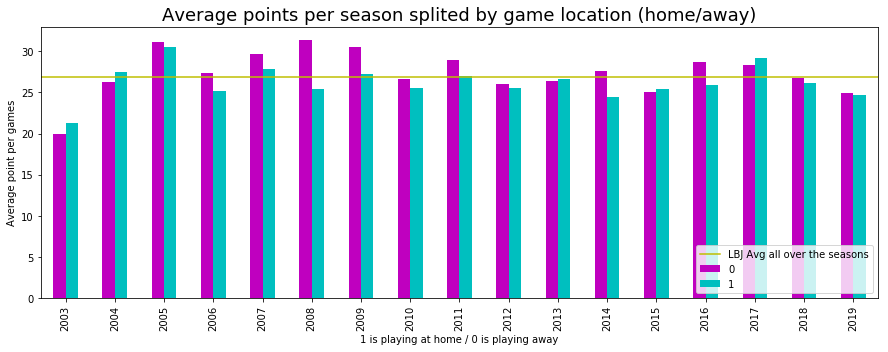

In [38]:
fig,ax= plt.subplots()
lbj.groupby(['SEASON_Ori','Home/Away_HOME'])['PTS'].mean().unstack().plot(kind='bar',color=['m','c'], ax=ax, figsize=(15,5))
ax.axhline(lbj['PTS'].mean(), c='y', linestyle='-', label="LBJ Avg all over the seasons")
ax.set_xlabel('1 is playing at home / 0 is playing away')
ax.set_ylabel('Average point per games')
ax.set_title(('Average points per season splited by game location (home/away)'), fontsize=18)
ax.legend(loc="lower right");

Here, at a first glance we quicly notice that Lebron James actually score more when playing away. Which is interesting, because the overall nba players are scoring more at home (next chart). Does he prefers to play with the pression? <br> <br>
Below the same information for all the players, where we notice a slight preference scoring at home.

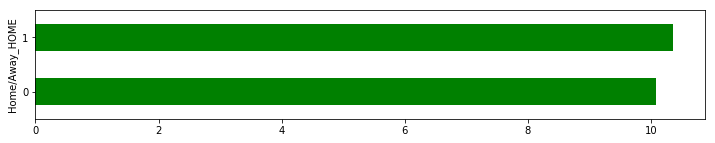

In [39]:
fig,ax= plt.subplots()
main.groupby('Home/Away_HOME')['PTS'].mean().plot(kind='barh',color='g', ax=ax, figsize=(12,2));

__About scoring against a team in the East or the West__ *(Note that he played in the East from 2003 to 2017)*

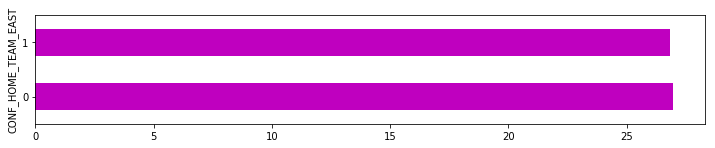

In [40]:
fig,ax= plt.subplots()
lbj.groupby('CONF_HOME_TEAM_EAST')['PTS'].mean().plot(kind='barh',color='m', ax=ax, figsize=(12,2));

It seems to have no impact, but it is quite different season after season as shown below, therefore not useless.

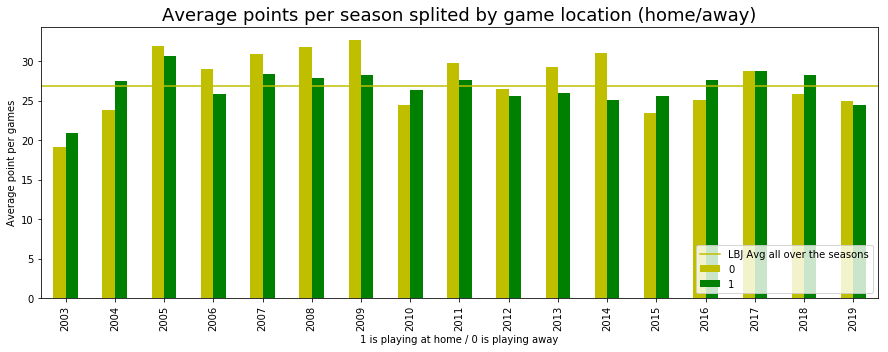

In [41]:
fig,ax= plt.subplots()
lbj.groupby(['SEASON_Ori','CONF_HOME_TEAM_EAST'])['PTS'].mean().unstack().plot(kind='bar',color=['y','g'], ax=ax, figsize=(15,5))
ax.axhline(lbj['PTS'].mean(), c='y', linestyle='-', label="LBJ Avg all over the seasons")
ax.set_xlabel('1 is playing at home / 0 is playing away')
ax.set_ylabel('Average point per games')
ax.set_title(('Average points per season splited by game location (home/away)'), fontsize=18)
ax.legend(loc="lower right");

Finally, let's dig into the __Opponent teams__

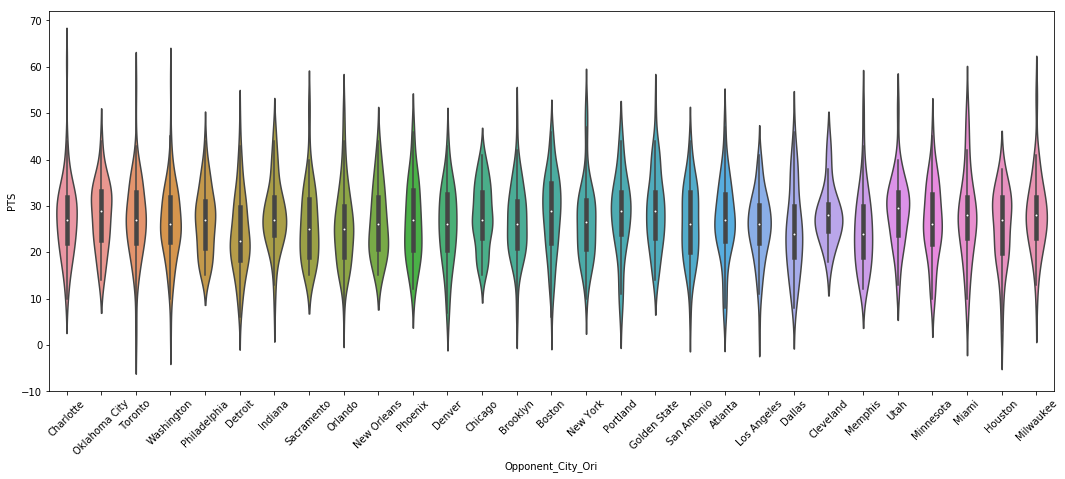

In [53]:
x=lbj['Opponent_City_Ori']
y=lbj['PTS']
plt.figure(figsize = (18,7))
ax = sns.violinplot(x=x, y=y, alpha =0.25)
plt.xticks(rotation=45);

This charts gives us an overview of the points scored against those teams. It has an interest if you know some teams, but we can not tell that he is particularly scoring more versus a specific team. <br>Although, I noticed that against Chicago (the penultimate) the dispersion is not that spread, which could make me think that he's pretty confortable against them. But we also have to keep in mind that rosters of those teams change over the seasons.
<br><br>
The bar chart below is a bit more explicit because we have the mean of the point scored against those teams (led by the coaching). This information coupled with the above chart makes the analysis a bit more relevant. <br>For example, against Detroit we see that the average is clearly lower, the team has a reputation of a good defensive team, and when look on the 1st chart, we notice that indeed we have more blue point around 10 (y-axis) than any others.

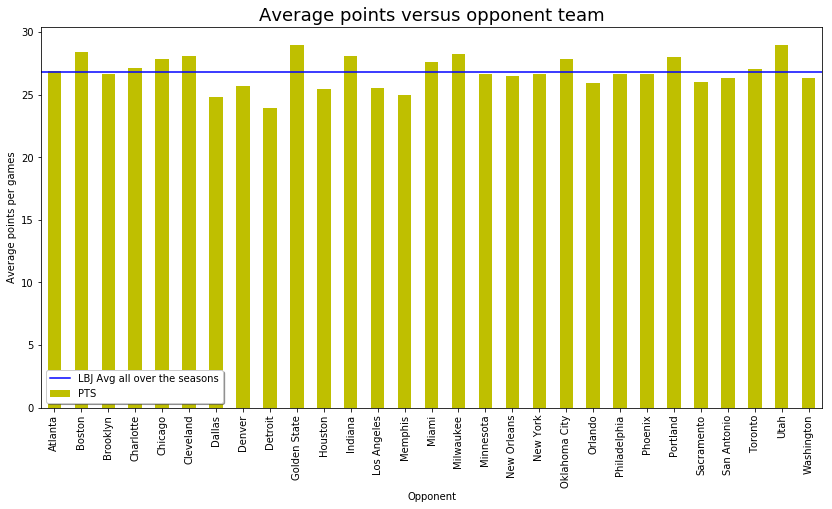

In [43]:
# Average points scored vs each opponent
fig,ax= plt.subplots()
lbj.groupby('Opponent_City_Ori')['PTS'].mean().plot(kind='bar',color='y', ax=ax, figsize=(14,7))
ax.axhline(lbj['PTS'].mean(), c='b', linestyle='-', label="LBJ Avg all over the seasons")
ax.set_xlabel('Opponent')
ax.set_ylabel('Average points per games')
ax.set_title(('Average points versus opponent team'), fontsize=18)
plt.legend(loc='lower left', fancybox=True, framealpha=1, shadow=True);

To end up this part of opponent, I use the feature created of the __strenght of the opponent__. To have a different angle of analysis and to makes more sense I work only on 2018 season, which is the last one completed.<br>
The upcoming chart compared the average number of point scored by Lebron James and comparing the strenght of the opponent. (As a reminder, strenght is built on the percentage of won games).

In [44]:
# opponent by strenght in 2018
lbj2018=lbj[lbj['SEASON_Ori']==2018]
lbj2018.head(2)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,FG_PCT,FGA,FGM,REB,MIN,PTS,...,Opponent_City_Oklahoma City,Opponent_City_Orlando,Opponent_City_Philadelphia,Opponent_City_Phoenix,Opponent_City_Portland,Opponent_City_Sacramento,Opponent_City_San Antonio,Opponent_City_Toronto,Opponent_City_Utah,Opponent_City_Washington
903,21800500,1610612747,Los Angeles,LeBron James,0.545,11.0,6.0,13.0,21.0,17.0,...,0,0,0,0,0,0,0,0,0,0
904,11800065,1610612747,Los Angeles,LeBron James,0.625,8.0,5.0,10.0,17.0,15.0,...,0,0,0,0,0,0,0,0,0,0


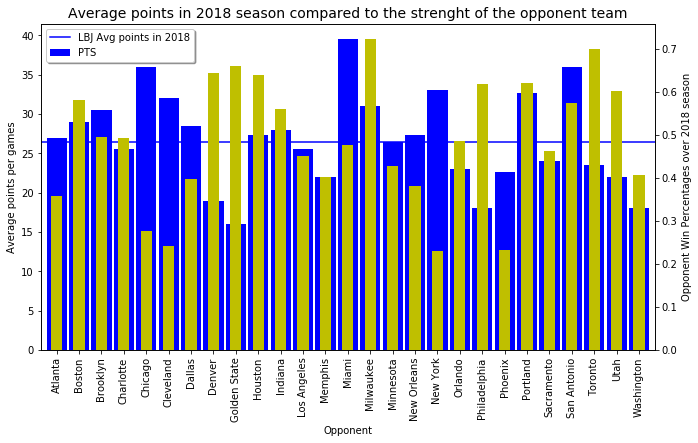

In [45]:
fig,ax= plt.subplots()
lbj2018.groupby('Opponent_City_Ori')['Opponent_Win_PCT'].mean().plot(kind='bar',color='y', ax=ax, figsize=(11,6), secondary_y=['Opponent_Win_PCT'])
lbj2018.groupby('Opponent_City_Ori')['PTS'].mean().plot(kind='bar',color='b', width=0.9, ax=ax, figsize=(11,6))
ax.axhline(lbj2018['PTS'].mean(), c='b', linestyle='-', label="LBJ Avg points in 2018")
ax.set_xlabel('Opponent')
ax.right_ax.set_ylabel('Opponent Win Percentages over 2018 season')
ax.set_ylabel('Average points per games')
ax.set_title(('Average points in 2018 season compared to the strenght of the opponent team'), fontsize=14)
ax.legend(loc='upper left', fancybox=True, framealpha=1,shadow=True); 

This quite nice chart tell me that usually, the weakest the opponent team is, the less Lebron James scores. This makes sense in his position of best player of his team, because if the opponent is not that strong he can let the others players play more.

__EDA LeBron James__

Over our analysis, we figure out that LeBron James is a player that seems to be quite regular in terms of performance, and his reputation confirms it. Even if we noticed some changes (e.g. scoring average per month), variation are most of the time quite low. This is important, because it means that it might be quite tough to have accurate prediction (versus a player that has clear different behaviours when playing in some circumstances). In the Machine learning part, we will first work on him, and then on another notebook for a different player to see if results change.

__EDA Overall comments__

This part tells us what seems to be sensitive to our target. We also learned that you may playing in the league for a lot of seasons, but maybe not having an high impact on score (e.g. chart with 25 players Kyle Korver is ranked 2 in terms of games played, but only 20 in terms of scoring). Obviously, drawing conclusion from those charts sounds like a shortcut. That's why there are professionnals dedicating all their time for those tasks!<br><br>
There is a couple of features (especially some that I created) that could have been further tested and visualized. My idea was not to go through every single details, but once built, to see if they can help my model in the Machine learning part. Although this part is really interesting, it is quite difficult to know where to stop showing charts and figures and being sure to have displayed the main ones.